# Linear and Polynomial Regression

## Exploratory Analysis

In [1]:
import sys
!{sys.executable} -m pip install financialanalysis

In [2]:
import pandas as pd
import financialanalysis as fa # 'pip install financialanalysis' in terminal if you don't have it

df = pd.read_csv('./TSLA.csv')

#checking for null values
print(df.isnull().sum())

#categorical -> float
df.Date = pd.to_datetime(df.Date)
df.Date = fa.datetimeToFloatyear(df.Date)
df.head()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010.490411,3.800,5.000,3.508,4.778,4.778,93831500
1,2010.493151,5.158,6.084,4.660,4.766,4.766,85935500
2,2010.495890,5.000,5.184,4.054,4.392,4.392,41094000
3,2010.498630,4.600,4.620,3.742,3.840,3.840,25699000
4,2010.509589,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
#finding outliers
print(df.shape)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(2841, 7)
Date         5.632877e+00
Open         5.470000e+01
High         5.546200e+01
Low          5.371600e+01
Close        5.492800e+01
Adj Close    5.492800e+01
Volume       2.766650e+07
dtype: float64
(2328, 7)


## Linear and Polynomial Regression

### Splitting Dataset

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=21)

# Need to be sorted for polynomial regression to work properly
train = train.sort_values(by=['Date'])
test = test.sort_values(by=['Date'])
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2,2010.495890,5.000,5.184,4.054,4.392,4.392,41094000
3,2010.498630,4.600,4.620,3.742,3.840,3.840,25699000
4,2010.509589,4.000,4.000,3.166,3.222,3.222,34334500
5,2010.512329,3.280,3.326,2.996,3.160,3.160,34608500
6,2010.515068,3.228,3.504,3.114,3.492,3.492,38557000


### Simple Linear Regression
Below is a simple linear regression model that predicts the closing price ``Close`` using the ``Date``.

Linear regression, testing Mean Squared Error: 0.2104


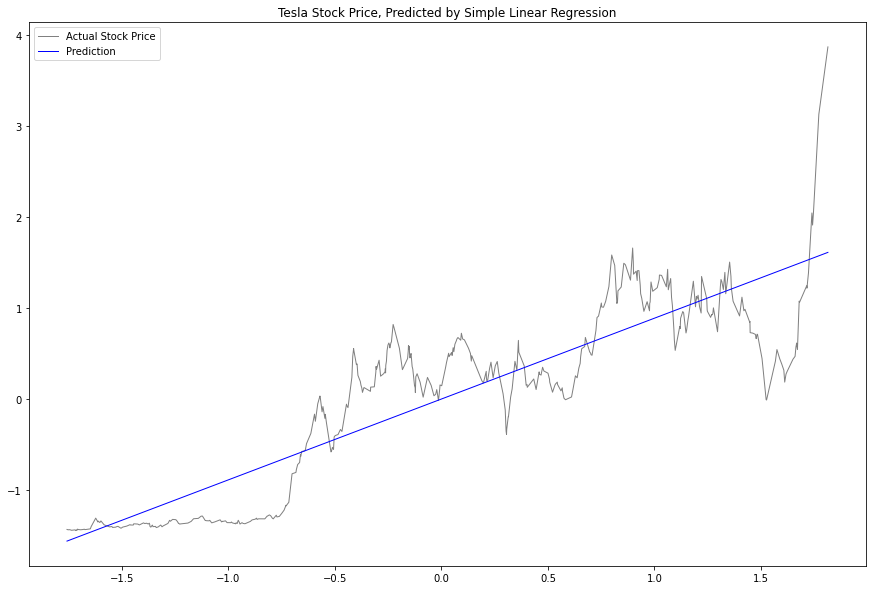

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

X_train, X_test = train['Date'], test['Date']
y_train, y_test = train['Close'], test['Close']

# Reshape data (sklearn gets mad if I don't)
X_train = StandardScaler().fit_transform(X_train.values.reshape(-1,1))
y_train = StandardScaler().fit_transform(y_train.values.reshape(-1,1))
X_test = StandardScaler().fit_transform(X_test.values.reshape(-1,1))
y_test = StandardScaler().fit_transform(y_test.values.reshape(-1,1))

# Fit linear model, run, calc MSE
lin_model = LinearRegression().fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print('Linear regression, testing Mean Squared Error: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(15,10))
plt.plot(X_test, y_test, color='gray', linewidth=1)
plt.title('Tesla Stock Price, Predicted by Simple Linear Regression')
plt.plot(X_test, y_pred, color='blue', linewidth=1)
plt.legend(['Actual Stock Price','Prediction'])
plt.show()

Linear Regression model that predicts the closing price ``Close`` using ``High`` or ``Low``

Linear regression with Low, testing Mean Squared Error: 0.2104
Linear regression with High, testing Mean Squared Error: 0.2104
Linear regression with Low&High, testing Mean Squared Error: 0.2104


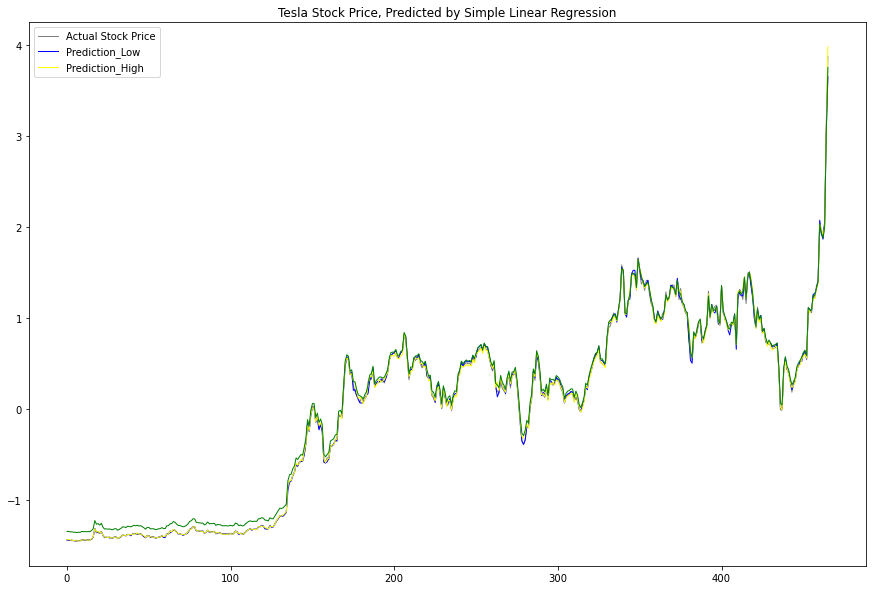

In [6]:
X_train_l, X_test_l = train['Low'], test['Low']
X_train_h, X_test_h = train['High'], test['High']
y_train, y_test = train['Close'], test['Close']

# Reshape data (sklearn gets mad if I don't)
X_train_l = StandardScaler().fit_transform(X_train_l.values.reshape(-1,1))
X_train_h = StandardScaler().fit_transform(X_train_h.values.reshape(-1,1))
y_train = StandardScaler().fit_transform(y_train.values.reshape(-1,1))
X_test_l = StandardScaler().fit_transform(X_test_l.values.reshape(-1,1))
X_test_h = StandardScaler().fit_transform(X_test_h.values.reshape(-1,1))
y_test = StandardScaler().fit_transform(y_test.values.reshape(-1,1))

# Fit linear model, run, calc MSE
lin_model = LinearRegression().fit(X_train_l, y_train)
y_pred_l = lin_model.predict(X_test_l)
print('Linear regression with Low, testing Mean Squared Error: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred)))
lin_model_h = LinearRegression().fit(X_train_h, y_train)
y_pred_h = lin_model_h.predict(X_test_h)
print('Linear regression with High, testing Mean Squared Error: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred)))

X_train_hl = pd.concat([train['High'],train['Low']],axis=1)
X_test_hl = pd.concat([test['High'],test['Low']],axis=1)

lin_model = LinearRegression().fit(X_train_hl, y_train)
y_pred_lh = lin_model.predict(X_test_hl)
print('Linear regression with Low&High, testing Mean Squared Error: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred)))


plt.figure(figsize=(15,10))
plt.plot(y_test, color='grey', linewidth=1)
plt.title('Tesla Stock Price, Predicted by Simple Linear Regression')
plt.plot(y_pred_l, color='blue', linewidth=1)
plt.plot(y_pred_h, color='yellow', linewidth=1)
plt.plot(y_pred_lh, color='green', linewidth=1)
plt.legend(['Actual Stock Price','Prediction_Low', 'Prediction_High'])
plt.show()

### Polynomial Regression
Polynomial regression models that predicts ``Close`` with the ``Date``

Degree 2, training MSE: 0.19162 and testing MSE: 0.18374
Degree 5, training MSE: 0.15940 and testing MSE: 0.15956
Degree 10, training MSE: 0.05239 and testing MSE: 0.06038
Degree 15, training MSE: 0.03805 and testing MSE: 0.09940
Degree 21, training MSE: 0.03127 and testing MSE: 0.04445


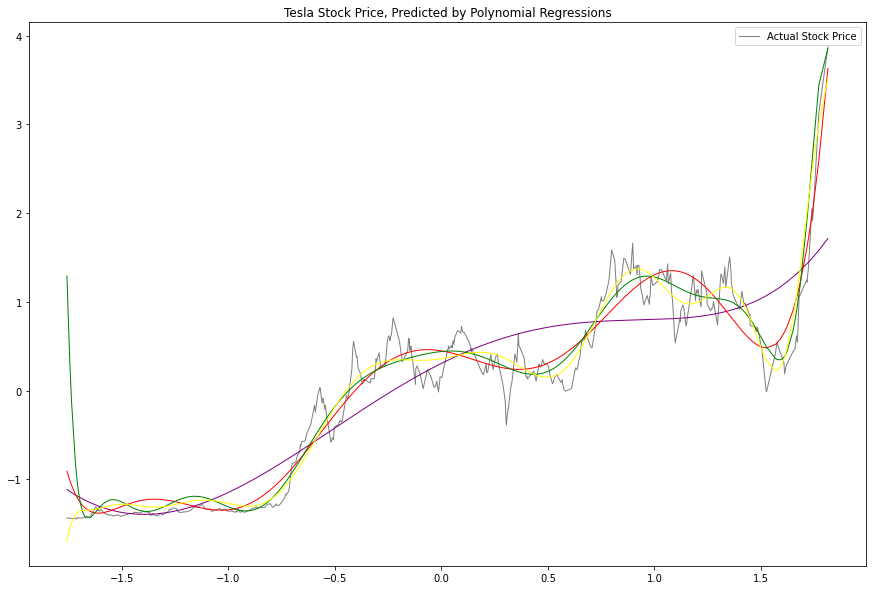

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train, X_test = train['Date'], test['Date']
y_train, y_test = train['Close'], test['Close']

# Reshape data (sklearn gets mad if I don't)
X_train = StandardScaler().fit_transform(X_train.values.reshape(-1,1))
y_train = StandardScaler().fit_transform(y_train.values.reshape(-1,1))
X_test = StandardScaler().fit_transform(X_test.values.reshape(-1,1))
y_test = StandardScaler().fit_transform(y_test.values.reshape(-1,1))

# Degree 2
polyreg = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train2 = metrics.mean_squared_error(y_train, y_pred)
y_pred2 = polyreg.predict(X_test)
test2 = metrics.mean_squared_error(y_test, y_pred2)

# Degree 5
polyreg = make_pipeline(PolynomialFeatures(5), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train5 = metrics.mean_squared_error(y_train, y_pred)
y_pred5 = polyreg.predict(X_test)
test5 = metrics.mean_squared_error(y_test, y_pred5)

# Degree 10
polyreg = make_pipeline(PolynomialFeatures(10), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train10 = metrics.mean_squared_error(y_train, y_pred)
y_pred10 = polyreg.predict(X_test)
test10 = metrics.mean_squared_error(y_test, y_pred10)

# Degree 15
polyreg = make_pipeline(PolynomialFeatures(15), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train15 = metrics.mean_squared_error(y_train, y_pred)
y_pred15 = polyreg.predict(X_test)
test15 = metrics.mean_squared_error(y_test, y_pred15)

# Degree 21
polyreg = make_pipeline(PolynomialFeatures(21), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train21 = metrics.mean_squared_error(y_train, y_pred)
y_pred21 = polyreg.predict(X_test)
test21 = metrics.mean_squared_error(y_test, y_pred21)

print('Degree 2, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train2, test2))
print('Degree 5, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train5, test5))
print('Degree 10, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train10, test10))
print('Degree 15, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train15, test15))
print('Degree 21, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train21, test21))

plt.figure(figsize=(15,10))
plt.title('Tesla Stock Price, Predicted by Polynomial Regressions')
plt.plot(X_test, y_test, color='gray', linewidth=1)
plt.plot(X_test, y_pred5, color='purple', linewidth=1)
plt.plot(X_test, y_pred10, color='red', linewidth=1)
plt.plot(X_test, y_pred15, color='green', linewidth=1)
plt.plot(X_test, y_pred21, color='yellow', linewidth=1)
plt.legend(['Actual Stock Price'])
plt.show()

Polynomial regression model predicts ``Close`` with ``High`` and ``Low``

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train2, X_test2 = X_train_hl ,X_test_hl
y_train2, y_test2 = y_train, y_test
# Degree 2
polyreg = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression())
polyreg.fit(X_train2, y_train2)
y_pred = polyreg.predict(X_train2)
train2 = metrics.mean_squared_error(y_train2, y_pred)
y_pred2 = polyreg.predict(X_test2)
test2 = metrics.mean_squared_error(y_test2, y_pred2)

# Degree 3
polyreg = make_pipeline(PolynomialFeatures(3), StandardScaler(), LinearRegression())
polyreg.fit(X_train2, y_train2)
y_pred = polyreg.predict(X_train2)
train3 = metrics.mean_squared_error(y_train2, y_pred)
y_pred3 = polyreg.predict(X_test2)
test3 = metrics.mean_squared_error(y_test2, y_pred3)

# Degree 4
polyreg = make_pipeline(PolynomialFeatures(4), StandardScaler(), LinearRegression())
polyreg.fit(X_train2, y_train2)
y_pred = polyreg.predict(X_train2)
train4 = metrics.mean_squared_error(y_train2, y_pred)
y_pred4 = polyreg.predict(X_test2)
test4 = metrics.mean_squared_error(y_test2, y_pred4)

# Degree 5
polyreg = make_pipeline(PolynomialFeatures(5), StandardScaler(), LinearRegression())
polyreg.fit(X_train2, y_train2)
y_pred = polyreg.predict(X_train2)
train5 = metrics.mean_squared_error(y_train2, y_pred)
y_pred5 = polyreg.predict(X_test2)
test5 = metrics.mean_squared_error(y_test2, y_pred5)

# Degree 6
polyreg = make_pipeline(PolynomialFeatures(6), StandardScaler(), LinearRegression())
polyreg.fit(X_train2, y_train2)
y_pred = polyreg.predict(X_train2)
train6 = metrics.mean_squared_error(y_train2, y_pred)
y_pred6 = polyreg.predict(X_test2)
test6 = metrics.mean_squared_error(y_test2, y_pred6)

print('Degree 2, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train2, test2))
print('Degree 3, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train3, test3))
print('Degree 4, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train4, test4))
print('Degree 5, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train5, test5))
print('Degree 6, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train6, test6))


Degree 2, training MSE: 0.00045 and testing MSE: 0.00373
Degree 3, training MSE: 0.00044 and testing MSE: 0.00371
Degree 4, training MSE: 0.00043 and testing MSE: 0.00374
Degree 5, training MSE: 0.00041 and testing MSE: 0.01827
Degree 6, training MSE: 0.00041 and testing MSE: 6.20981


The performance for the last two are  the worst and therefore withdrawn from plot.

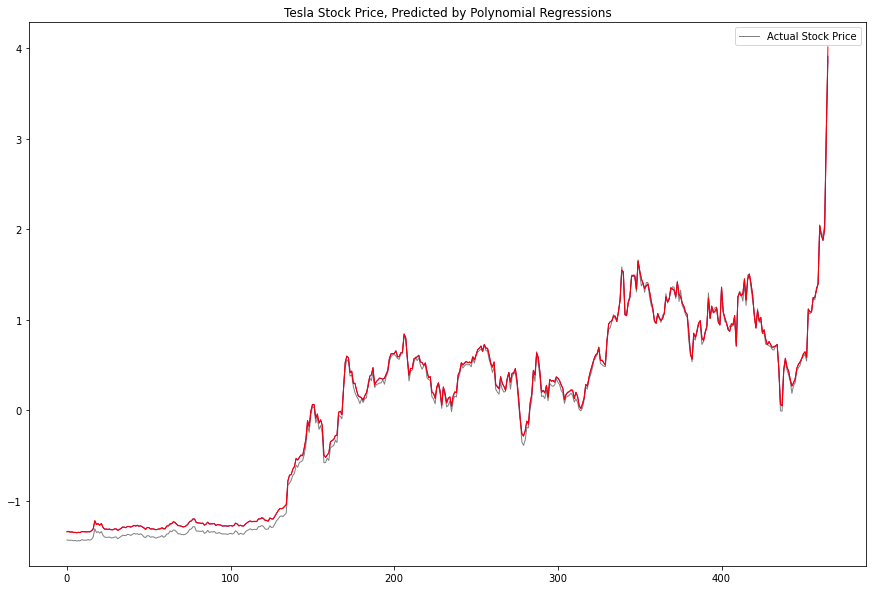

In [9]:
plt.figure(figsize=(15,10))
plt.title('Tesla Stock Price, Predicted by Polynomial Regressions')
plt.plot(y_test2, color='gray', linewidth=1)
plt.plot(y_pred3, color='purple', linewidth=1)
plt.plot(y_pred4, color='red', linewidth=1)
#plt.plot(y_pred25, color='green', linewidth=1)
#plt.plot(y_pred50, color='yellow', linewidth=1)
plt.legend(['Actual Stock Price'])
plt.show()